In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import operator
from functools import reduce
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [2]:
path=r"C:\Users\xuhao_yang\PycharmProjects\sz3\data\iris.data"

In [4]:
data=pd.read_csv(path,header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data[4]=pd.Categorical(data[4]).codes
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
x,y=np.split(data.values,(4,),axis=1)#数据切割

In [7]:
x=x[:,:2]

In [8]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [13]:
lr=Pipeline([("sc",StandardScaler()),
             ("poly",PolynomialFeatures()),
             ("clf",LogisticRegression())])#处理数据
lr.fit(x,y.ravel())

C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xuhao_yang\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [14]:
y_new=lr.predict(x)

In [15]:
np.mean(y_new==y.ravel())

0.8133333333333334

In [33]:
y_new_prob=lr.predict_proba(x)

No handles with labels found to put in legend.


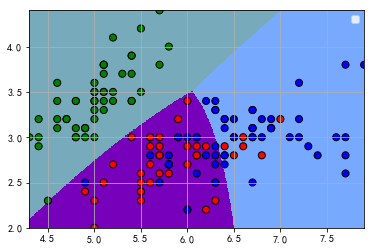

In [40]:
N,M=500,500
x1_min,x1_max=x[:,0].min(),x[:,0].max()#第一列的范围
x2_min,x2_max=x[:,1].min(),x[:,1].max()#第二列的范围
t1=np.linspace(x1_min,x1_max,N)
t2=np.linspace(x2_min,x2_max,M)
x1,x2=np.meshgrid(t1,t2)
x_test=np.stack((x1.flat,x2.flat),axis=1)#测试的点

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False##解决中文乱码


cmp_light=mpl.colors.ListedColormap(["#77AABB","#7700BB","#77AAFF"])
cmp_dark=mpl.colors.ListedColormap(["g","r","b"])
y_new=lr.predict(x_test)
y_new=y_new.reshape(x1.shape)

plt.figure(facecolor="w")
plt.pcolormesh(x1,x2,y_new,cmap=cmp_light)
plt.scatter(x[:,0],x[:,1],c=y.ravel(),edgecolors="k",s=50,cmap=cmp_dark)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.grid()
plt.legend()
plt.show()